
# Q4. DBSCAN
1. Use DBSCAN to cluster the data.
2. DBSCAN algorithm requires 2 parameters - epsilon and minPts. Show all experiments you did to arrive at the final eps and minPts.
3. Analyse the clusters formed.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot
import pandas as pd
import sklearn.decomposition 
from sklearn.neighbors import NearestNeighbors
import kneebow.rotor
import sklearn.cluster  
import sklearn.metrics 

## Getting Data and Headers

In [2]:
dataset = pd.read_csv('../football_data.csv')
toKeep = np.array([3, 7, 8, 11, 12, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88])
X = dataset.iloc[:,toKeep].values
header = dataset.iloc[:,toKeep].columns

print("Getting the data and headers.")
print("Shape of new data:", X.shape)

row_length = X.shape[0]
col_length = X.shape[1]

Getting the data and headers.
Shape of new data: (18207, 75)


## Preprocessing Data

In [3]:



overview_value_wage_arr = [3,4,X.shape[1]-1]
overview_value_wage_arr = np.array(overview_value_wage_arr)

'''
Removing Euro, Million, and K sign from wage and values
'''
print("Removing Euro, Million, and K sign from wage and values.")
for j in overview_value_wage_arr:
    for i in range(row_length):
        if type(X[i,j]) is not float:
            last_char = X[i,j][-1]
            if last_char == 'M':
                X[i,j] = 1000000*float(X[i,j][1:-1])
            elif last_char == 'K':
                X[i,j] = 1000*float(X[i,j][1:-1])
            else:
                X[i,j]=0

'''
Extracting year from date
'''
print("Extracting year from date.")
for j in range(10,12):
    for i in range(row_length):
        if type(X[i,j]) is not float:
            year = X[i,j][-4:]
            year = float(year)
            X[i,j] = year

'''
Getting height in inches
'''
print("Getting height in inches.")
for i in range (row_length):
    if type(X[i,12]) is not float:
        hh = X[i,12].split("'")
        ft = float(hh[0])
        ich = float(hh[1])
        ich = ich + 12*ft
        float(ich)
        X[i,12]=ich
      
'''
Extracting weight value by removing "lbs"
'''
print("Extracting weight value by removing lbs.")
for i in range(X.shape[0]):
    if type(X[i,13]) is not float:
        wgt = X[i,13][:-3]
        wgt = float(wgt)
        X[i,13] = wgt
        
'''
Converting all numeric data to float
'''
print("Converting all numeric data to float.")
for i in range(40,col_length-1):
    X[:,i].astype(float)

'''
Removing "+" signs if any
'''
print("Removing + signs if any.")
for j in range(14,40):
    for i in range (row_length):
        if type(X[i,j]) is not float:
            hh = X[i,j].split("+")
            fv = float(hh[0])
            sv = float(hh[1])
            X[i,j]=fv+sv

X=X.astype(float)


import sklearn.impute
impobj = sklearn.impute.SimpleImputer(missing_values = np.nan, strategy = 'mean') 
for j in range(col_length):
    impobj = impobj.fit(X[:, j:j+1])
    X[:, j:j+1] = impobj.transform(X[:, j:j+1])    


temp=X
toKeep=np.array([])
for i in range(0,6):
    toKeep=np.append(toKeep,i)
for i in range(12,14):
    toKeep=np.append(toKeep,i)
toKeep=np.append(toKeep,[15,19,27,37])
for i in range(40,75):
    toKeep=np.append(toKeep,i)
toKeep=toKeep.astype(int)

X=X[:,toKeep]
header=header[toKeep]


import sklearn.preprocessing
X2 = sklearn.preprocessing.StandardScaler().fit_transform(X)




Removing Euro, Million, and K sign from wage and values.
Extracting year from date.
Getting height in inches.
Extracting weight value by removing lbs.
Converting all numeric data to float.
Removing + signs if any.


## PCA and DBSCAN

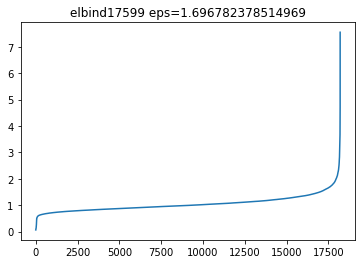

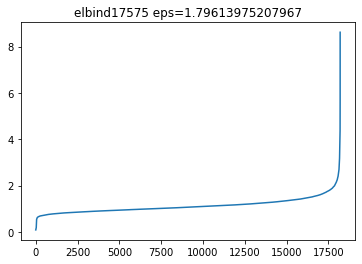

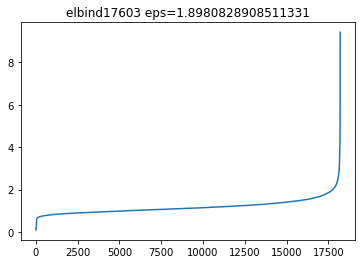

5.250472899676422  13.569951769531608


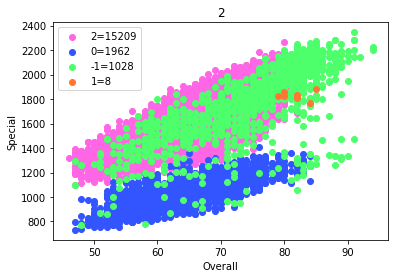

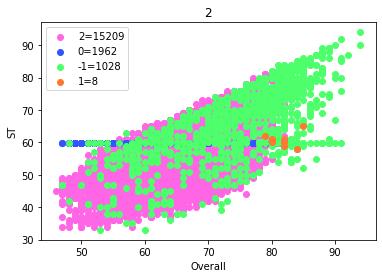

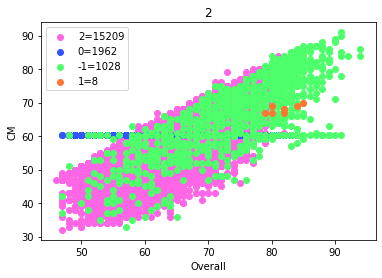

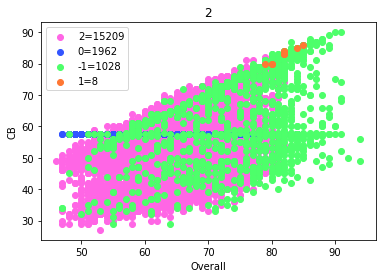

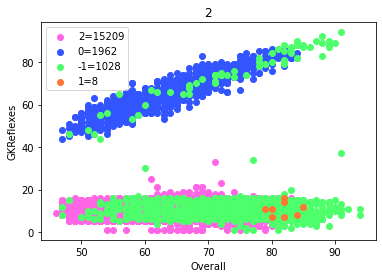

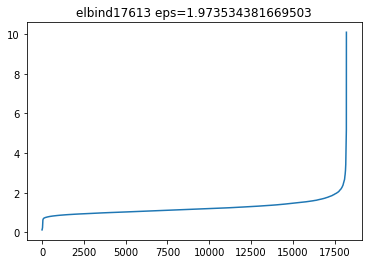

5.2647560084167955  13.572502546290806


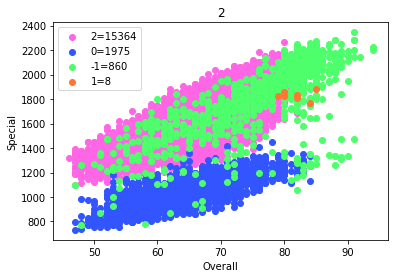

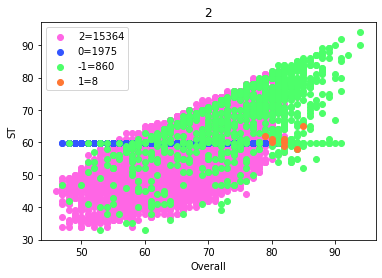

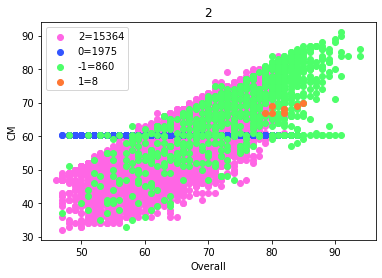

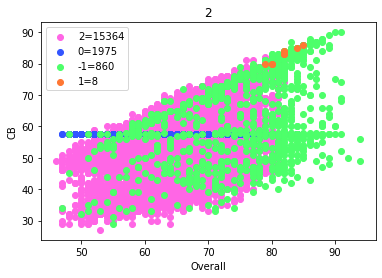

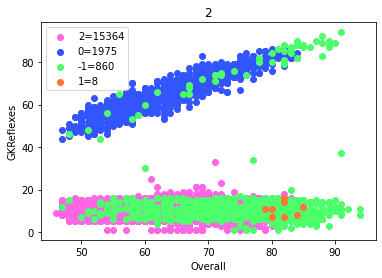

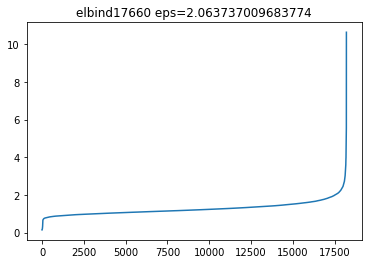

6.340436169929964  14.146943731017014


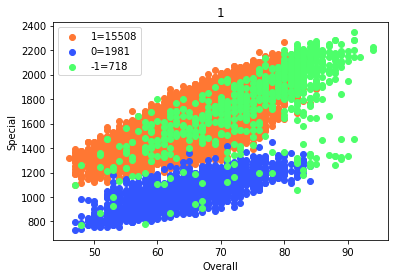

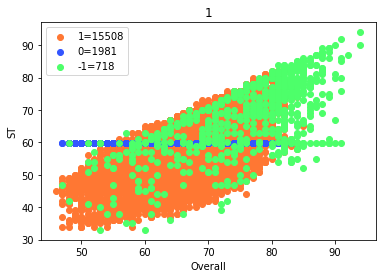

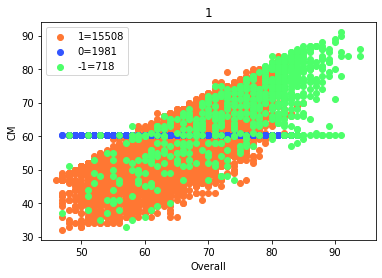

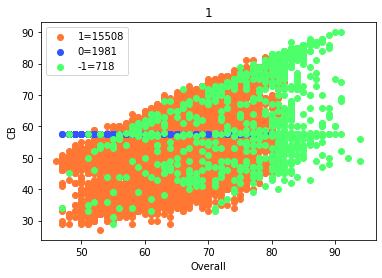

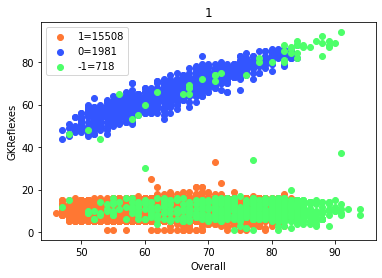

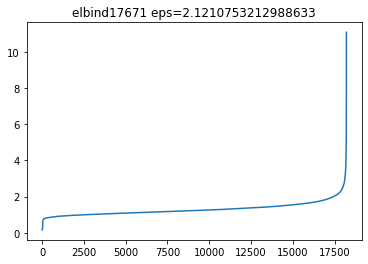

6.353903447809993  14.15828488230813


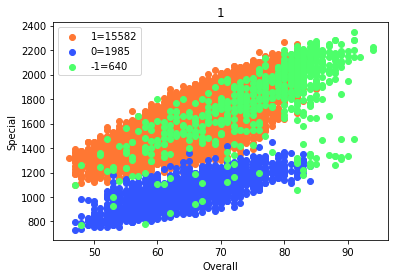

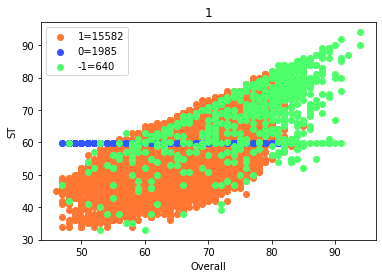

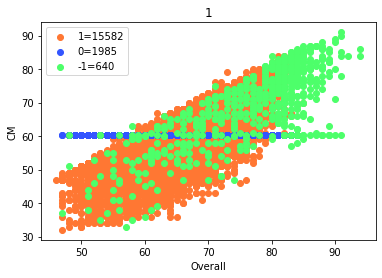

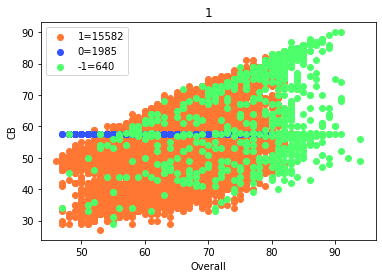

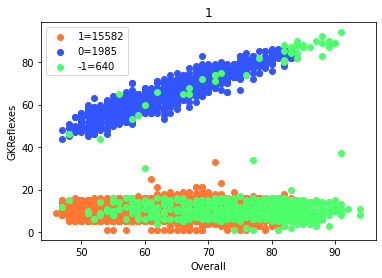

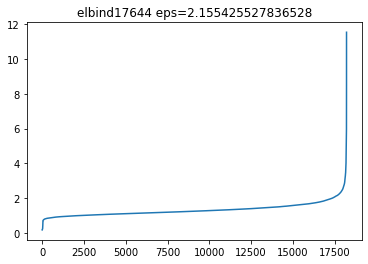

6.357832806913647  14.16074637065306


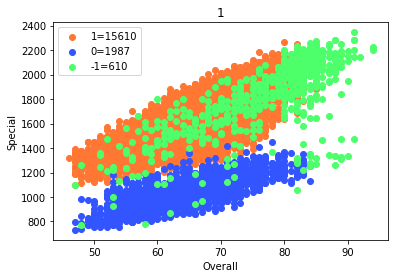

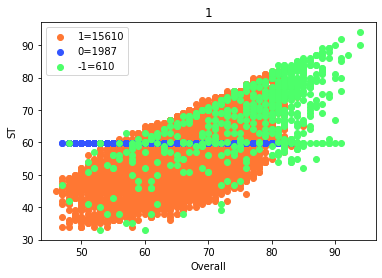

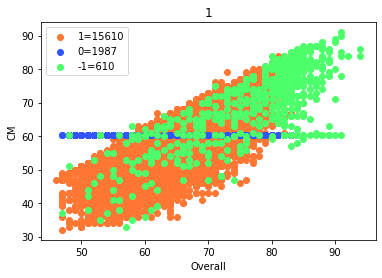

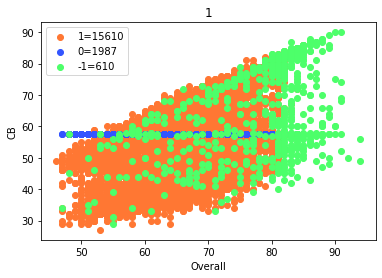

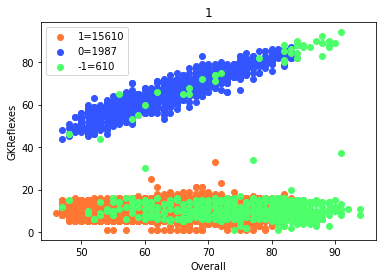

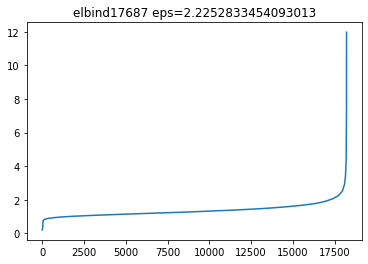

6.369233831754048  14.170485814522484


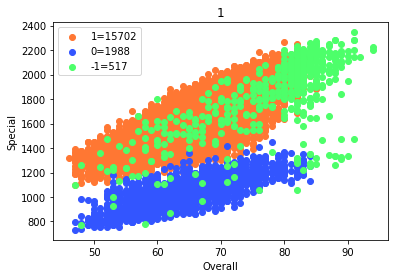

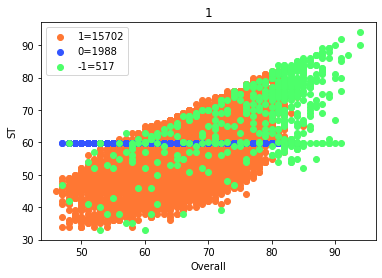

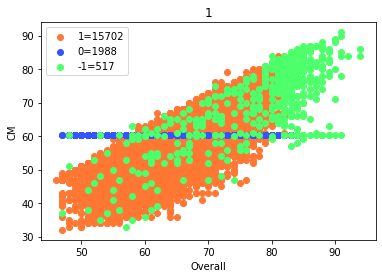

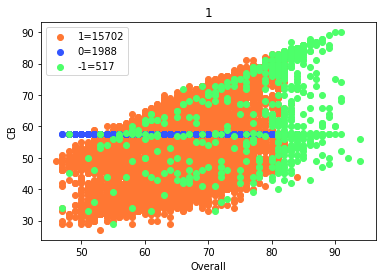

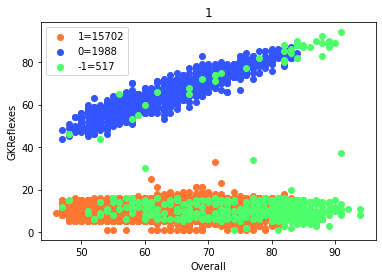

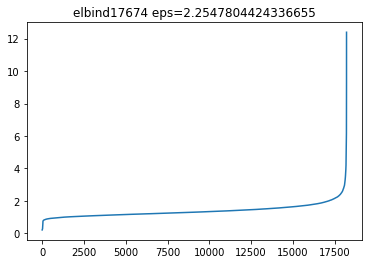

6.372460604669882  14.173180377923567


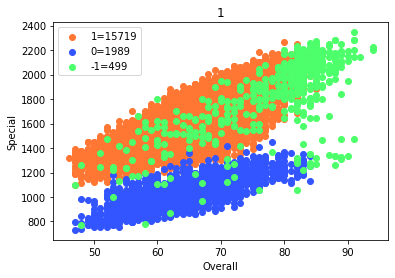

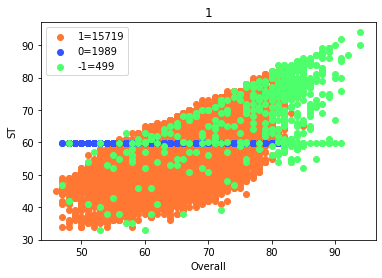

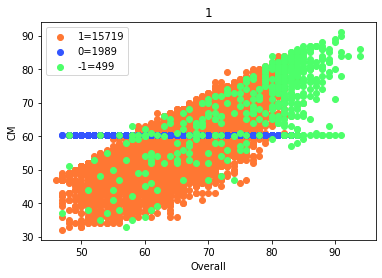

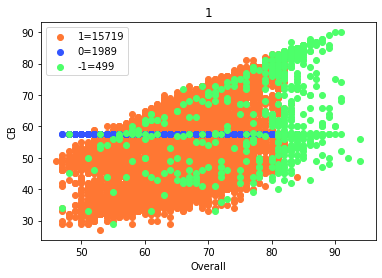

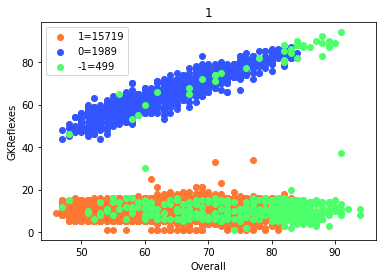

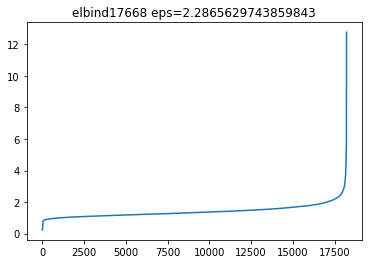

6.375931733669055  14.175263512589641


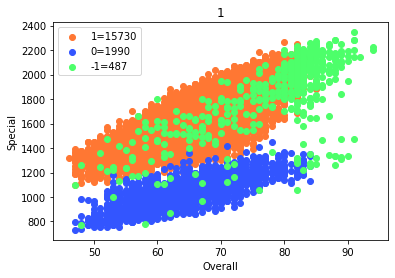

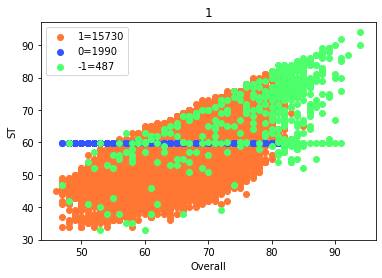

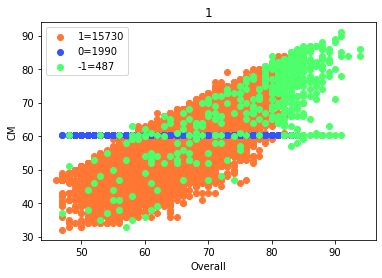

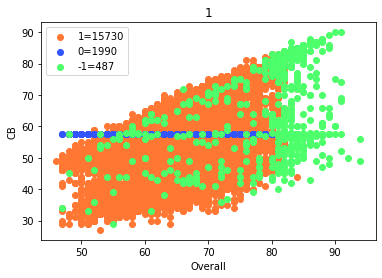

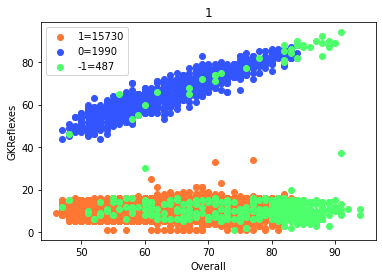

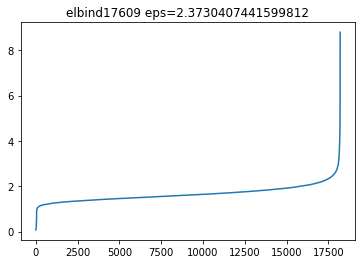

3.719149007237231  12.823275628276562


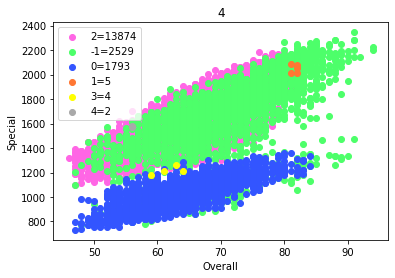

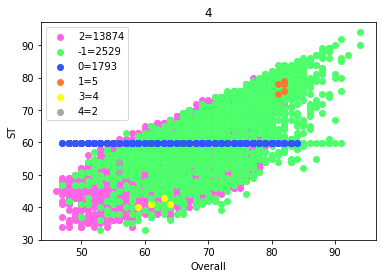

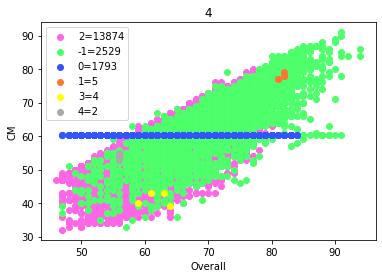

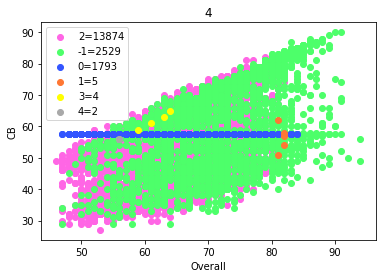

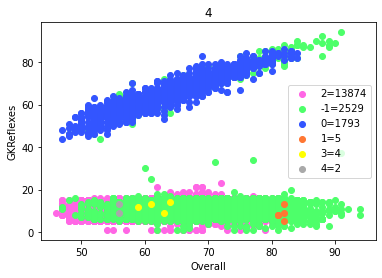

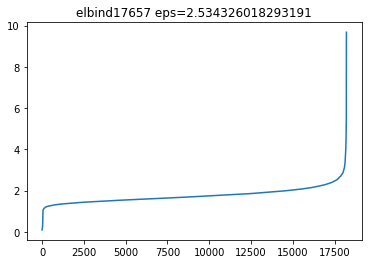

4.370497074443179  12.898034611195163


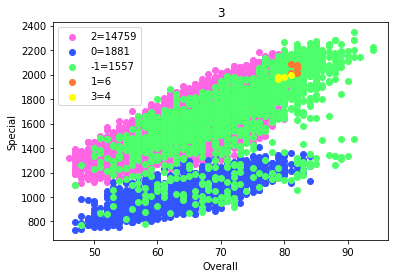

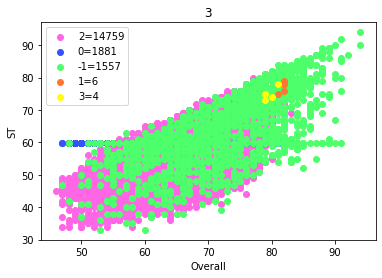

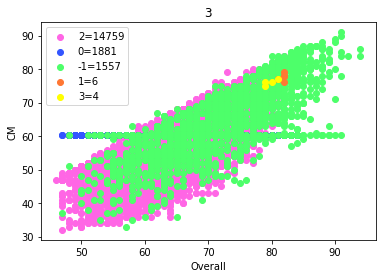

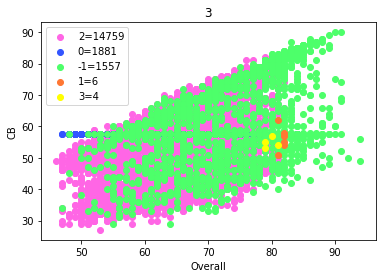

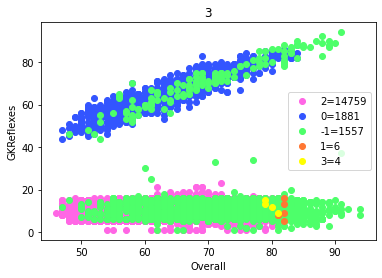

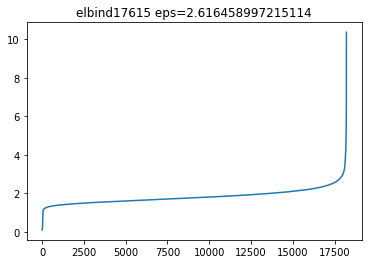

6.2682319757162315  14.11826825263246


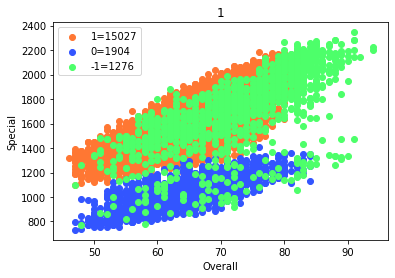

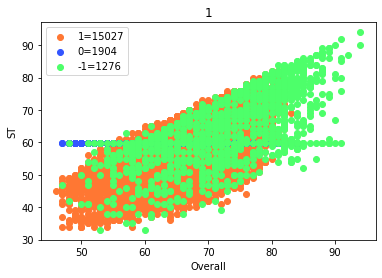

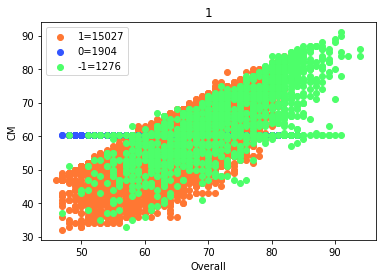

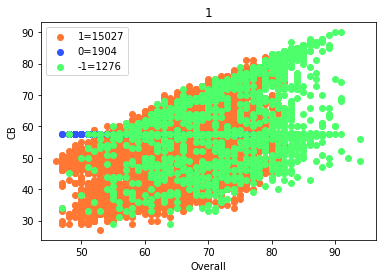

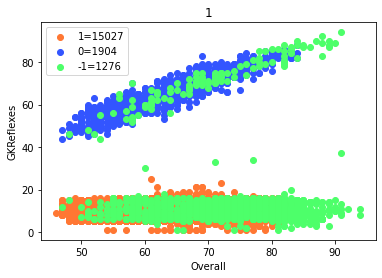

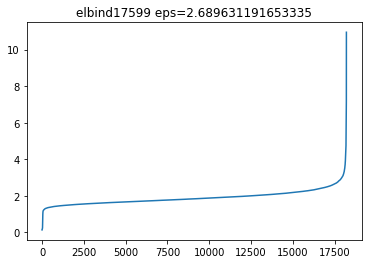

6.286787499051311  14.127023634581219


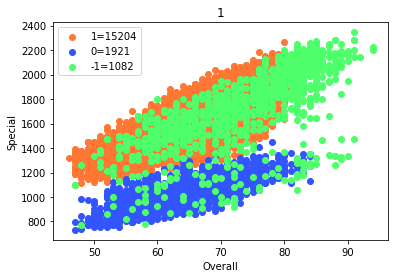

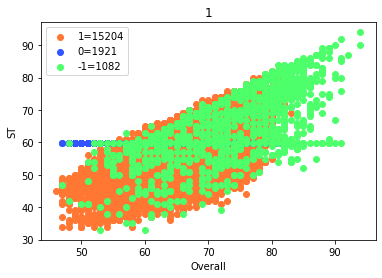

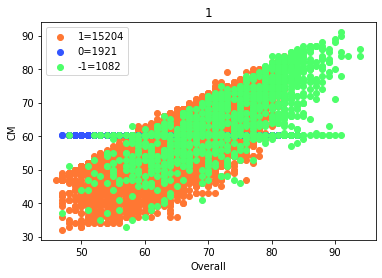

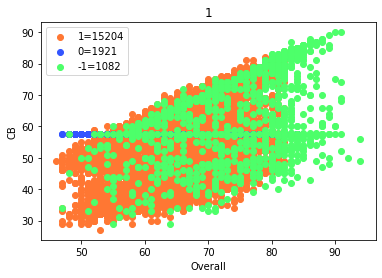

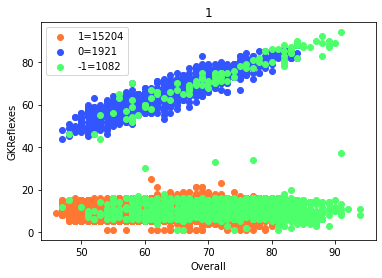

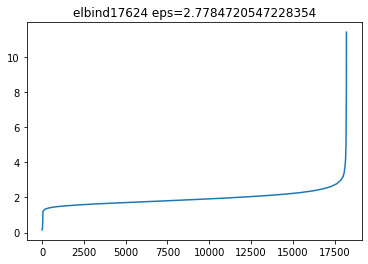

6.318255142750468  14.144735809342006


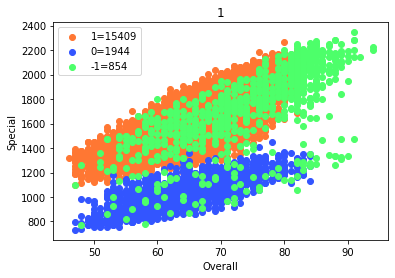

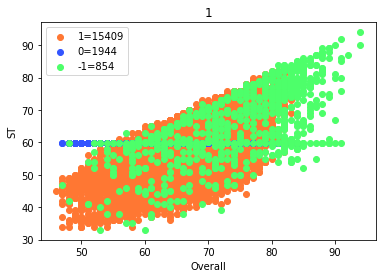

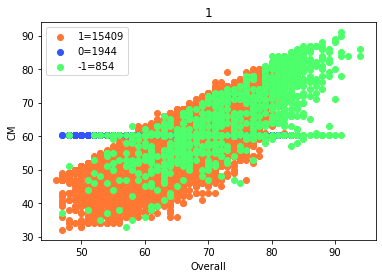

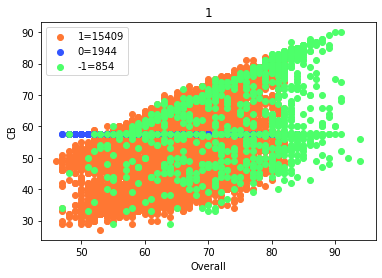

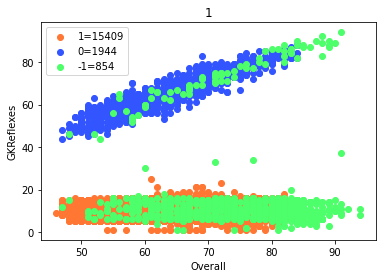

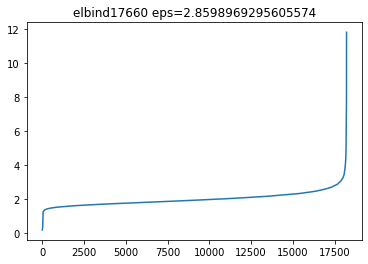

6.342379023316382  14.158474905619093


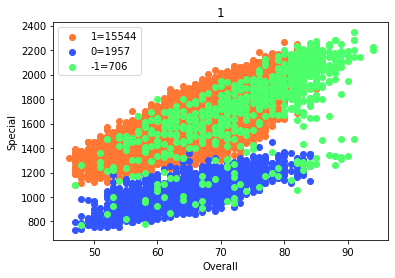

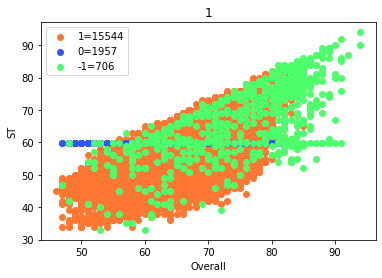

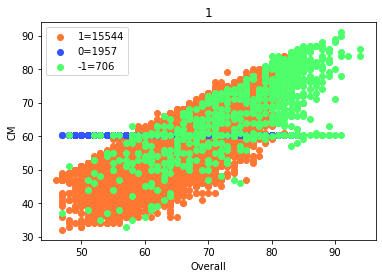

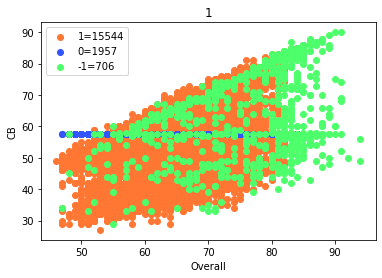

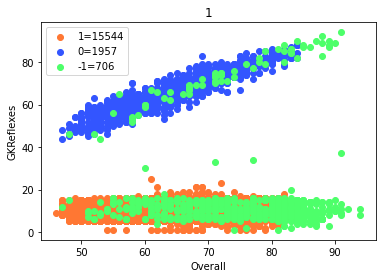

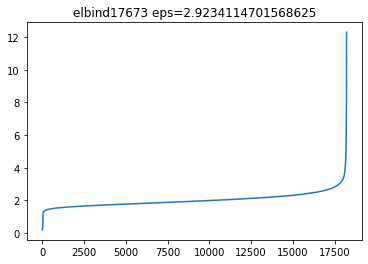

6.355921531768084  14.169249715618186


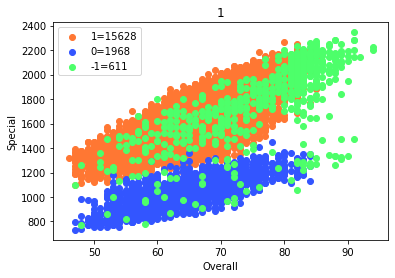

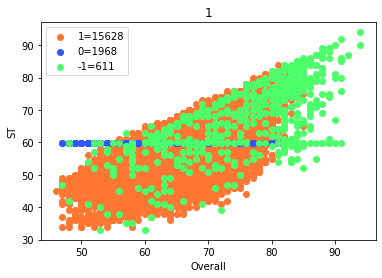

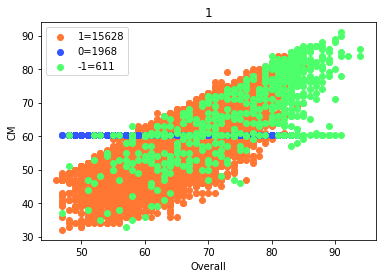

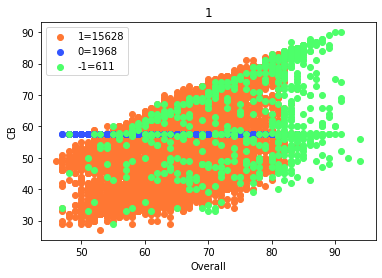

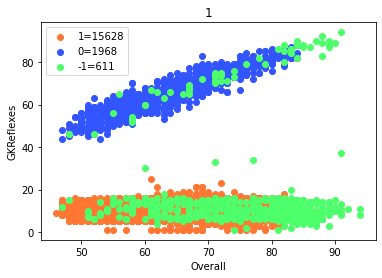

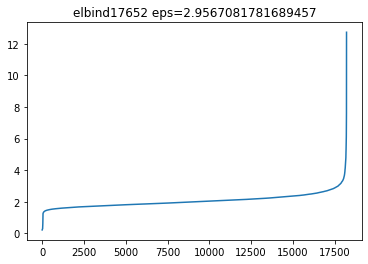

6.361524883894214  14.174521546208059


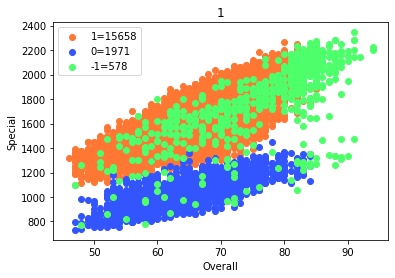

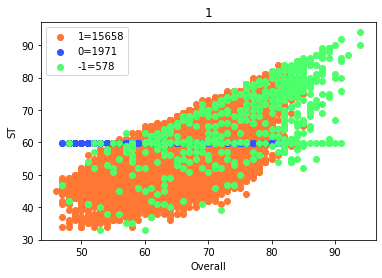

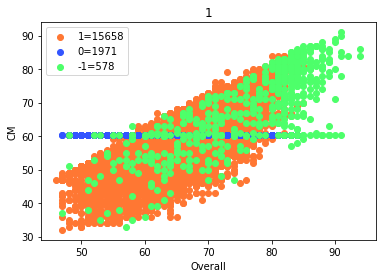

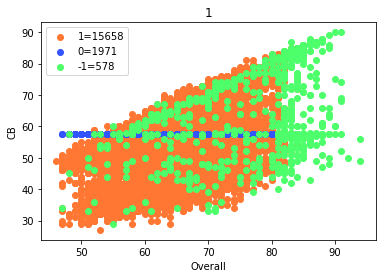

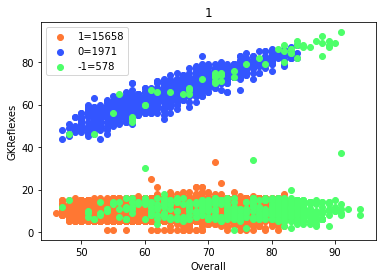

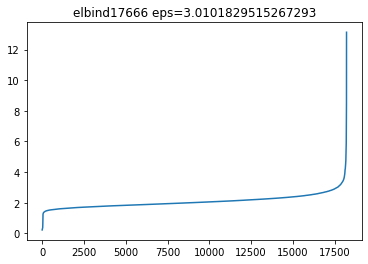

6.371329168063484  14.179956493429845


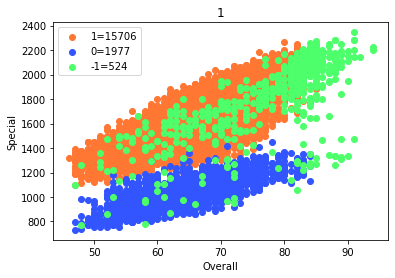

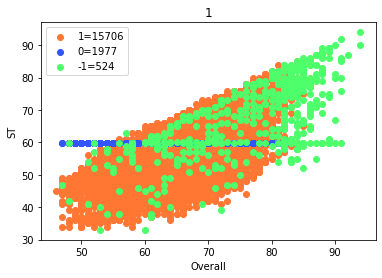

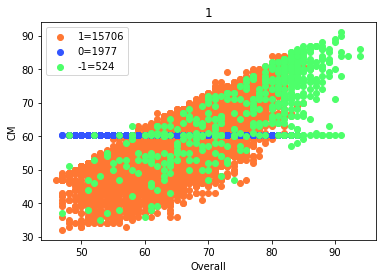

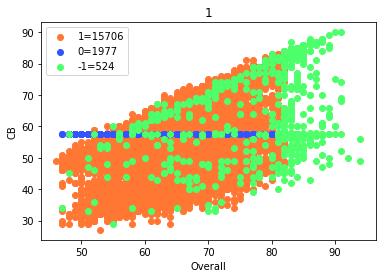

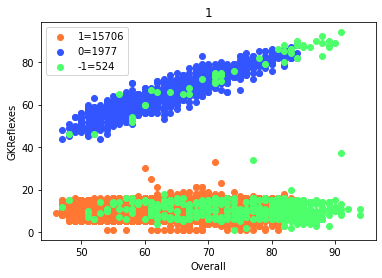

In [ ]:
def freq(labels):
    mp=dict()
    for i in labels:
        if i in mp.keys():
            mp[i]+=1
        else:
            mp[i]=1
    return [k for k, v in sorted(mp.items(),reverse=True, key=lambda item: item[1])]

def draw(labels,intraClass,interClass):
    
    mp=freq(labels)
    
    for arg in [5,8,10,11,45]:
        matplotlib.pyplot.figure()
        
        clist= ['#4DFF6A','#3355FF','#FF7733','#FF66E5','#FFFF00','#A9A9A9','#7e52c3']    

        for i in mp:
            matplotlib.pyplot.scatter(X[labels==i][:,1],X[labels==i][:,arg],color=clist[i+1],label=str(i)+"="+str(np.sum(labels==i)))
            
        matplotlib.pyplot.xlabel(header[1])
        matplotlib.pyplot.ylabel(header[arg])
        matplotlib.pyplot.legend()
        matplotlib.pyplot.title(str(np.max(labels)))
        matplotlib.pyplot.show() 
        
stats=[]

for n_components in [10,20]:
    pca = sklearn.decomposition.PCA(n_components = n_components)
    X3= pca.fit_transform(X2) 
    
    for n_neighbors in range(5,15):
      
        nei = NearestNeighbors(n_neighbors=n_neighbors)
        neighbs = nei.fit(X3)
        '''
        dist
        '''
        dist, indices = neighbs.kneighbors(X3)
        dist = np.sort(np.mean(dist,axis=1), axis=0)
        matplotlib.pyplot.plot(dist)
          
        temp=np.append(indices[:,0:1],dist.reshape(dist.shape[0],1),axis=1)      
        rotor = kneebow.rotor.Rotor()
        rotor.fit_rotate(temp)
        elbind = rotor.get_elbow_index()
        '''
        ploting
        '''
        matplotlib.pyplot.title("elbind"+str(elbind)+" eps=" + str(dist[elbind]))
        matplotlib.pyplot.show()
        
        intraClass=0
        interClass=0
        db_default = sklearn.cluster.DBSCAN(eps = dist[elbind], min_samples = n_neighbors).fit(X3) 
        labels = db_default.labels_ 
        
        if np.max(labels) >= 5:
            continue
            
        n_clusters=np.max(labels)
        n_clusters += 1 
        
        for i in range(n_clusters):
            intraClass=intraClass+np.mean(sklearn.metrics.pairwise.pairwise_distances(X2[labels==i],metric='euclidean'))
            '''
            from i+1 to n
            '''
            for j in range(i+1,n_clusters):
                interClass=interClass+np.mean(sklearn.metrics.pairwise.pairwise_distances(X2[labels==i],X2[labels==j],metric='euclidean'))
       
        intraClass/=n_clusters
        interClass/=((n_clusters*(n_clusters-1))/2)   
        stats.append([interClass/intraClass,interClass,intraClass,dist[elbind],n_neighbors,n_components,n_clusters])
        print(str(intraClass)+"  "+str(interClass))
        draw(labels,intraClass,interClass) 
        
stats=sorted(stats,reverse=True)